<a href="https://colab.research.google.com/github/apolaf44/GeneralRepository/blob/main/Clasificador_Audio_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalamos dependencias

In [ ]:
pip uninstall tensorflow

Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.2+zzzcolab20220527125636.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.7/dist-packages/tensorflow/include/external/local_config_python/numpy_include/numpy/libdivide/LICENSE.txt
    /usr/local/lib/python3.7/dist-packages/tensorflow/include/external/local_config_python/numpy_include/numpy/libdivide/libdivide.h
    /usr/local/lib/python3.7/dist-packages/tensorflow/include/external/local_config_python/numpy_include/numpy/random

In [ ]:
!pip install tensorflow tensorflow-gpu tensorflow-io matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 5.9 kB/s 
     |████████████████████████████████| 438 kB 46.8 MB/s 
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
     |████████████████████████████████| 1.6 MB 39.2 MB/s 
     |████████████████████████████████| 5.8 MB 37.4 MB/s 
  Using cached tensorflow_gpu-2.9.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (511.7 MB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfull

Cargamos las dependencias

In [ ]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio


# **2. Creamos Funciones para cargar la Data**

2.1 Definir Paths a Files

In [ ]:
Capuchino_file = os.path.join('DATA' , '/content/DATA/Capuchinos Clips' , 'XC3776-3.wav' )
No_Capuchino_file = os.path.join('DATA' , '/content/DATA/No Capuchinos' , 'afternoon-birds-song-in-forest-0.wav')

In [ ]:
Capuchino_file

'/content/DATA/Capuchinos Clips/XC3776-3.wav'

In [ ]:
len(No_Capuchino_file)

64

In [ ]:
def load_wav_16k_mono(filename):
  # Cargamos las carpetas wav 
  file_contents = tf.io.read_file(filename)
  # Decodificamos a  y en Mono
  wav , sample_rate = tf.audio.decode_wav(file_contents , desired_channels=1)
  # Removemos Axis
  wav = tf.squeeze(wav, axis=-1)
  sample_rate = tf.cast(sample_rate , dtype=tf.int64)
  # Va desde 44100Hz a 16000Hz - Amplitud de la señal de audio
  wav = tfio.audio.resample(wav , rate_in=44100 , rate_out=16000)
  return wav


In [ ]:
# En este caso solo nos trae los archivos convertidos en Strings
file_contents = tf.io.read_file(Capuchino_file)

In [ ]:
 # Aqui decodificamos a Wav neustros arcivhos y que sea de 1 canal = Mono
 wav , sample_rate = tf.audio.decode_wav(file_contents , desired_channels=1)

In [ ]:
# Nos trae la Amplitud 
#len(wav)
wav

<tf.Tensor: shape=(132300, 1), dtype=float32, numpy=
array([[-0.11117554],
       [-0.0378418 ],
       [ 0.05856323],
       ...,
       [-0.01077271],
       [-0.03436279],
       [-0.04879761]], dtype=float32)>

2.3 Plot Wave

In [ ]:
wave = load_wav_16k_mono(Capuchino_file)

In [ ]:
nwave = load_wav_16k_mono(No_Capuchino_file)

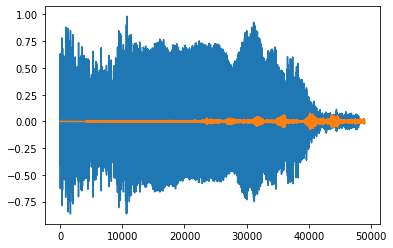

In [ ]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

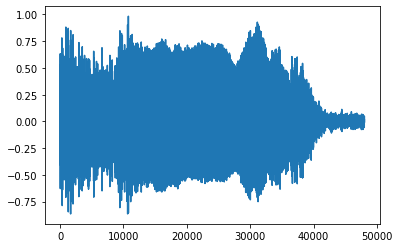

In [ ]:
plt.plot(wave)


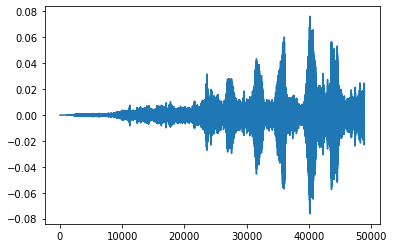

In [ ]:
plt.plot(nwave)

# **3.Creacion Dataset con Tensorflow**

 3.1 Definimos Paths para Data positiva y negativa

In [ ]:
POS = os.path.join('DATA' , '/content/DATA/Capuchinos Clips')
NEG = os.path.join('DATA' , '/content/DATA/No Capuchinos' )

In [ ]:
POS

'/content/DATA/Capuchinos Clips'

3.2 Creamos Tensorflow Datasets

In [ ]:
pos = tf.data.Dataset.list_files(POS+'/*.wav')
neg = tf.data.Dataset.list_files(NEG+'/*.wav')

# En este caso lo que logramos es crear un Dataset
# con TensorFlow y traer todos los valores que terminan con .wav

In [ ]:
pos.as_numpy_iterator().next()
# Tiene el Path Definido, pero es un String

b'/content/DATA/Capuchinos Clips/XC65196-3.wav'

3.3 Adherimos etiquetas y combinamos samples Positivos y Negativos

In [ ]:
len(pos)
tf.ones(len(pos))

<tf.Tensor: shape=(217,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [ ]:
len(neg)
tf.zeros(len(neg))

<tf.Tensor: shape=(593,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [ ]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

In [ ]:
# Utilizando el .zip nos permite concatenar en una misma linea
# Entonces le pasamos nuestro Dataset pos y lo concatenamos con el mismo Dataset pero con numeros 1 en cada una de sus filas
# Creame 1 segun el shape de nuestro set pos

# Hacemos lo mismo con el metodo .zeros

# Entonces al final tendremos un Clasificador Binario



In [ ]:
positives.as_numpy_iterator().next()
# Al ver su Path, tambien logramos apreciar el Numero 1.0

(b'/content/DATA/Capuchinos Clips/XC600460-5.wav', 1.0)

In [ ]:
negatives.as_numpy_iterator().next()
# Numero 0.0 

(b'/content/DATA/No Capuchinos/cricket-sounds-for-sleep-12.wav', 0.0)

In [ ]:
data.shuffle(1000).as_numpy_iterator().next()
# Si vemos nuestro nuevo set de datos binario y lo vamos probando
# Obtendremos valores diferentes siempre, entre 0 & 1`s

(b'/content/DATA/No Capuchinos/cricket-sounds-for-sleep-14.wav', 0.0)

# **4. Determinar el tamaño Promedio(AVG) del canto de las Aves Capuchinos**

4.1 Calcular el tamaño del Circulo de la Onda

In [ ]:
lengths = []
for archivo in os.listdir(os.path.join('DATA', '/content/DATA/Capuchinos Clips')):
    tensor_wave = load_wav_16k_mono(os.path.join('DATA', '/content/DATA/Capuchinos Clips', archivo))
    lengths.append(len(tensor_wave))


In [ ]:
# Creamos una Variable con un Array
# lengths = []

In [ ]:
# listdir()

# Listar directorio en Python con listdir()
#Esta función recibe como argumento una ruta 
#del sistema de ficheros y devuelve una lista 
#con los nombres de los archivos y carpetas que contiene. 
#Si no se pasa ningún argumento, el directorio de referencia 
#es la carpeta actual.

#os.listdir(os.path.join('DATA' , '/content/DATA/Capuchinos Clips'))

In [ ]:
#lengths

4.2 Media, Minimo y Máximo

In [ ]:
# Promedio/ Media
tf.math.reduce_mean(lengths)
# reduce_mean. Calcula la media de elementos 
# a través de las dimensiones de un tensor.

# Tenemos 54387 Valores

<tf.Tensor: shape=(), dtype=int32, numpy=54387>

In [ ]:
# Tenemos 16.000 Hz Per Second

54387/16000

3.3991875

In [ ]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=8000>

In [ ]:
# El más cortito dura:
8000/16000

0.5

In [ ]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=80000>

In [ ]:
# El más largo dura:
80000/16000

5.0

# **5. Construimos Funcion Pre-Procesada para Convertir a Espectograma**

5.1 Función pre-procesada

In [ ]:
def preprocess(file_path, label):
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav) , dtype=tf.float32)
    wav = tf.concat([zero_padding , wav], 0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram , axis=2)
    return spectrogram, label 

5.2 Probamos la funcion y Visualizamos el Espectograma

In [ ]:
filepath , label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [ ]:
spectrogram, label = preprocess(filepath, label)

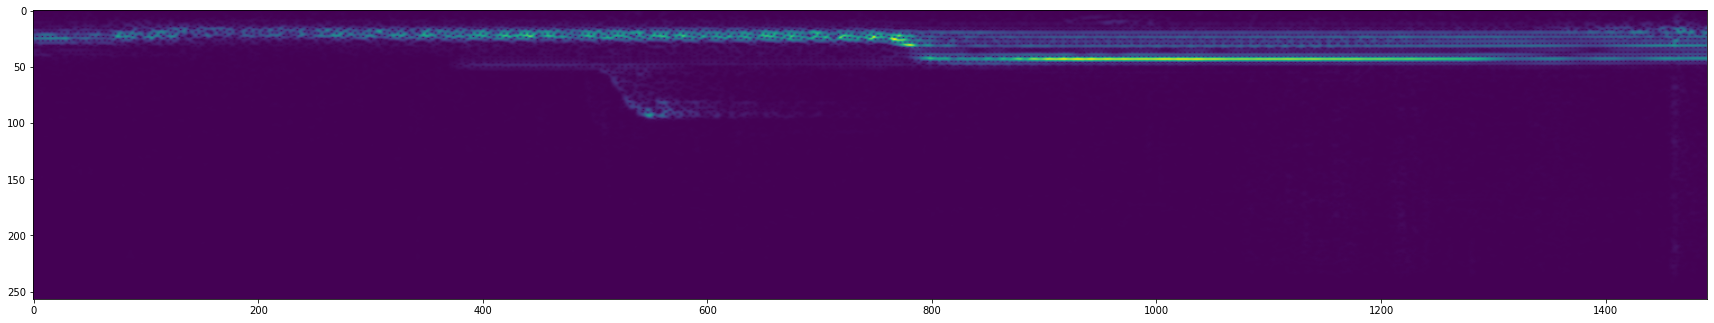

In [ ]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

# **6. Creamos particiones de Training y Testing**

6.1 Creamos un Tensorflow y Data Pipeline

In [ ]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

6.2 Mezclamos entre particiones de Train y Test

In [ ]:
# Vemos cuanto mide nuestra data (sample)
len(data)

51

In [ ]:
# Tomamos un %70
len(data)*.7

35.699999999999996

In [ ]:
# Tomamos un %70 de nuestra data para entrenar
# Y el %30 restante lo utilizamos para Testing
# Con el .skip() "deja pasar" 36 para luego tomar 15

train = data.take(36)
test = data.skip(36).take(15)

6.3 Testeamos un Batch


In [ ]:
samples, labels = train.as_numpy_iterator().next()

In [ ]:
samples.shape
# Tendremos 16 diferentes ejemplos de Espectogramas. 
# Que tienen la forma de (1491, 257, 1)

(16, 1491, 257, 1)

In [ ]:
print(labels.shape , " - " , labels)

(16,)  -  [1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1.]


# **7. Crear un Modelo de Deep Learning**

7.1 Cargamos Dependencias de Tensorflow

In [ ]:
 from tensorflow.keras.models import Sequential
 from tensorflow.keras.layers import Conv2D, Dense , Flatten

7.2 Crear Squential Model, compilar y ver summary

In [ ]:
# Utilizamos el Modelo Sequential
model = Sequential()
# Red Convulosional de 16 Kernel , 3X3 , input_shape-> Nos sirve para matchear con nuestro espectrograma
model.add(Conv2D(16 , (3,3) , activation='relu' , input_shape=(1491, 257, 1)))
model.add(Conv2D(16, (3,3), activation='relu'))
# Luego de que lo pasamos por las Redes
# Lo bajamos a 1 simple dimension con le Flatten
model.add(Flatten())
# Luego lo pasamos por un Layer de Dense 
model.add(Dense(128, activation='relu'))
# Y al final el Ultimo Layer de 1 solo valor que va a ser 0 o 1
model.add(Dense(1 , activation='sigmoid'))

In [ ]:
# Compilamos 
# Utilizamos el Optimizador Adam, con el Clasificador Binario, y especificamos métricas.

model.compile('Adam' , loss='BinaryCrossentropy' , metrics=[tf.keras.metrics.Recall() , tf.keras.metrics.Precision()])

In [ ]:
# Lo vemos

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1489, 255, 16)     160       
                                                                 
 conv2d_1 (Conv2D)           (None, 1487, 253, 16)     2320      
                                                                 
 flatten (Flatten)           (None, 6019376)           0         
                                                                 
 dense (Dense)               (None, 128)               770480256 
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 770,482,865
Trainable params: 770,482,865
Non-trainable params: 0
_________________________________________________________________


7.3 Entrenamos el Modelo, View Loss y Visualizaciones de KPI´s

In [ ]:
hist = model.fit(train , epochs=4 , validation_data=test )

Epoch 1/4
